# Train Plots

## Read Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

csv_folder = "metrics"
run_name = "exp3"

train_metrics = ['train/obj_loss', 'train/box_loss', 'train/cls_loss',  # train loss
                        'x/lr0', 'x/lr1', 'x/lr2', 'train/mean_loss', 'epoch']
val_metrics = ['val/mean_corner_err_2d', 'val/acc', 'val/acc3d', 'val/acc10cm10deg', # val metrics
                         'val/obj_loss', 'val/box_loss', 'val/cls_loss','val/mean_loss', 'val/total_loss']



metric_dict = {}
for metric in train_metrics + val_metrics:
   
   df = pd.read_csv(f"{csv_folder}/{run_name}/{metric}.csv")
   metric_dict[metric] = df

# create plot for mean_loss
train_mean_loss_df = metric_dict['train/mean_loss']
val_mean_loss_df = metric_dict['val/mean_loss']
lr0_df = metric_dict['']

epoch_df = metric_dict['epoch']

df_merged_val = pd.merge_asof(val_mean_loss_df, epoch_df, on="_step", direction="backward")
df_merged_train = pd.merge_asof(train_mean_loss_df, epoch_df, on="_step", direction="nearest")

## Plots

In [ ]:


min_val_loss_epoch = df_merged_val.loc[df_merged_val['val/mean_loss'].idxmin(), 'epoch']
print(f"Epoch with minimal val/mean_loss: {min_val_loss_epoch}")
print(df_merged_train['train/mean_loss'][206])
print(df_merged_train['epoch'].unique())
print(df_merged_val['epoch'].unique())

print("plotting...")
plt.figure(figsize=(10, 5))
plt.plot(df_merged_train['epoch'], df_merged_train['train/mean_loss'], label='train/mean_loss') 
plt.plot(df_merged_val['epoch'], df_merged_val['val/mean_loss'], label='val/mean_loss')

# Mark the epoch with minimal val/mean_loss on the plot
plt.axvline(x=min_val_loss_epoch, color='r', linestyle='--', label=f'Min Val Loss Epoch ({min_val_loss_epoch})')

plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.title('Mean Loss over Epoch')
plt.legend()
plt.grid()

plt.show()


# Test Plots

## Read Data

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

folder = "real_train_real_test/"
# folder = "sim_train_sim_test/"
# folder = "real_train_sim_test/"
# folder = "sim_train_real_test/"

# Read CSV files from the directory
csv_path = 'runs/test/' + folder
results = 'test_results.csv'
summary = 'test_summary.csv'
save_path = '/home/ondra/BC/graphs/' + folder


df_results = pd.read_csv(csv_path + results)  # Replace 'data.csv' with the actual file name
# print(df_results.head())

df_summary = pd.read_csv(csv_path + summary)  # Replace 'summary.csv' with the actual file name
print(df_summary.head())

   mean_corner_err_2d  pixel_threshold  vertex_threshold      acc2d     acc3d  \
0            2.784074                5              0.02  92.411143  6.916426   

   acc10cm10deg     nts  trans_error  angle_error   mean_iou  
0     52.689721  2082.0     0.738943     2.790804  86.380498  


## Plots


#### to accommodate the unit conversion.

In [83]:
# df_results["distance_gt"] *= 100

#### summary plot

In [84]:
columns = list(["acc2d", "acc3d", "acc10cm10deg",  "mean_iou"])

df_summary = df_summary[columns]

latex_table = df_summary.to_latex(index=False, float_format="%.2f")

# Save the LaTeX table to a file
with open(save_path + 'summary_table.tex', 'w') as f:
    f.write(latex_table)

print("LaTeX table saved to 'summary_table.tex'")

LaTeX table saved to 'summary_table.tex'


### Plot translation distance over distance

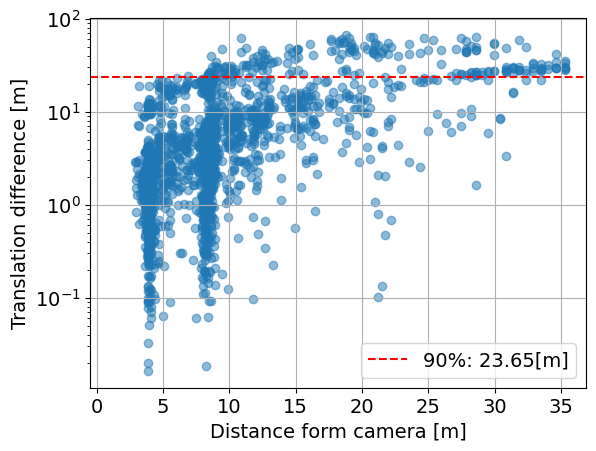

In [85]:
fig, ax = plt.subplots()

# it is a distance between t_pred and t_gt
scatter = ax.scatter(df_results['distance_gt'], df_results['trans_dist'], alpha=0.5)

# Calculate the 90th percentile of the translation distance
percentile_90 = df_results['trans_dist'].quantile(0.9)

# Add a horizontal line at the 90th percentile
ax.axhline(y=percentile_90, color='r', linestyle='--', label=f'90%: {percentile_90:.2f}[m]')
# Increase the font size of the numbers on the axis
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14)

ax.set_xlim(-0.5)
ax.set_yscale('log')

ax.set_xlabel('Distance form camera [m]', fontsize=14)
ax.set_ylabel('Translation difference [m]', fontsize=14)
ax.grid(True)

# Save the plot as a PDF
fig.savefig(save_path + 'translation_distance_over_distance.pdf', format='pdf')
plt.show()

#### Angular Distance over Distance

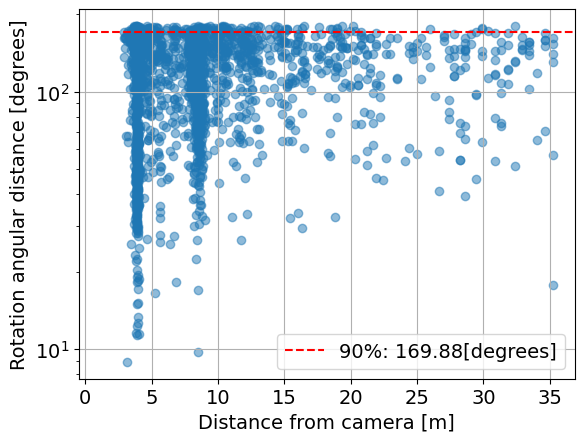

In [86]:
fig, ax = plt.subplots()

# Scatter plot
scatter = ax.scatter(df_results['distance_gt'], df_results['angle_dist'], alpha=0.5)

# Calculate the 90th percentile of the angle distance
percentile_90 = df_results['angle_dist'].quantile(0.9)

# Add a horizontal line at the 90th percentile
ax.axhline(y=percentile_90, color='r', linestyle='--', label=f'90%: {percentile_90:.2f}[degrees]')
# Increase the font size of the numbers on the axis
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14)

ax.set_xlim(-0.5)
ax.set_yscale('log')
ax.set_xlabel('Distance from camera [m]', fontsize=14)
ax.set_ylabel('Rotation angular distance [degrees]', fontsize=14)
ax.grid(True)

# Save the plot as a PDF
fig.savefig(save_path + 'angular_distance_over_distance_log.pdf', format='pdf')
plt.show()

#### Angular Distance over Distance

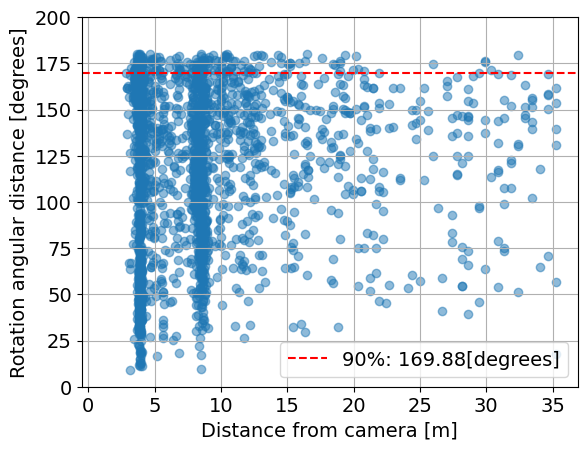

In [87]:
fig, ax = plt.subplots()

# Scatter plot
scatter = ax.scatter(df_results['distance_gt'], df_results['angle_dist'], alpha=0.5)

# Calculate the 90th percentile of the angle distance
percentile_90 = df_results['angle_dist'].quantile(0.9)

# Add a horizontal line at the 90th percentile
ax.axhline(y=percentile_90, color='r', linestyle='--', label=f'90%: {percentile_90:.2f}[degrees]')
# Increase the font size of the numbers on the axis
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14)

ax.set_xlim(-0.5)
ax.set_ylim(0, 200)
ax.set_xlabel('Distance from camera [m]', fontsize=14)
ax.set_ylabel('Rotation angular distance [degrees]', fontsize=14)
ax.grid(True)

# Save the plot as a PDF
fig.savefig(save_path + 'angular_distance_over_distance.pdf', format='pdf')
plt.show()

#### Distribution of Angular Distance

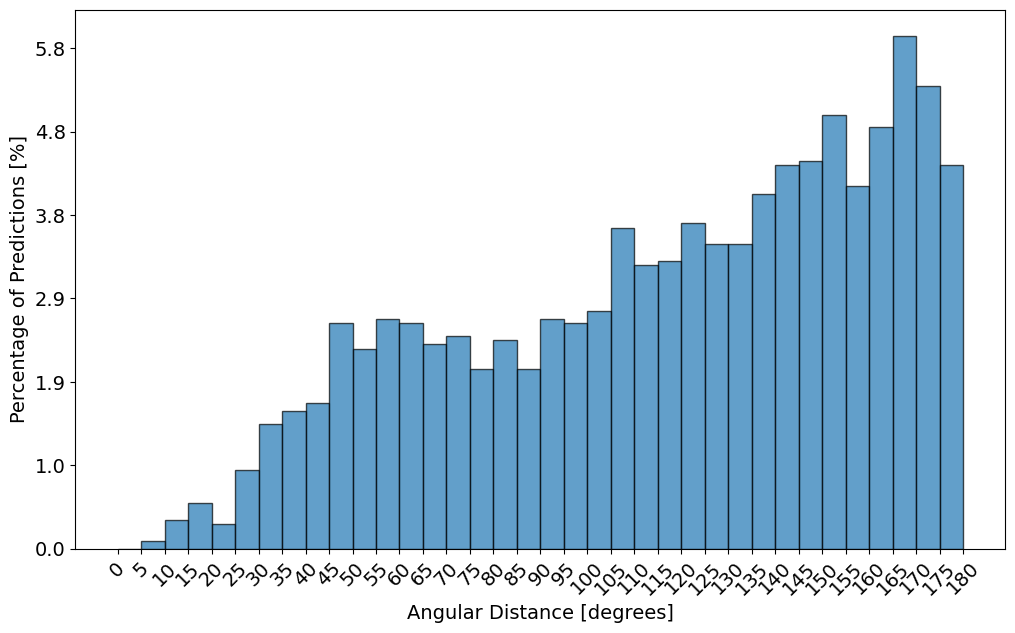

In [88]:
fig, ax = plt.subplots()

bins = range(0, int(df_results['angle_dist'].max()) + 5, 5)

# Plot the histogram
counts, _, _ = ax.hist(df_results['angle_dist'], bins=bins, edgecolor='black', alpha=0.7)

ax.set_xlabel('Angular Distance [degrees]', fontsize=14)
ax.set_ylabel('Percentage of Predictions [%]', fontsize=14)
ax.set_xticks(bins)
ax.tick_params(axis='x', rotation=45)
# Increase the font size of the numbers on the axis
ax.tick_params(axis='both', which='major', labelsize=14)

total_predictions = len(df_results)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y / total_predictions) * 100:.1f}'))

fig.set_size_inches(12, 7)  # Set the figure size to make the plot wider

# Save the plot as a PDF
fig.savefig(save_path + 'angular_distance_distribution.pdf', format='pdf')

### Corner distance over distance

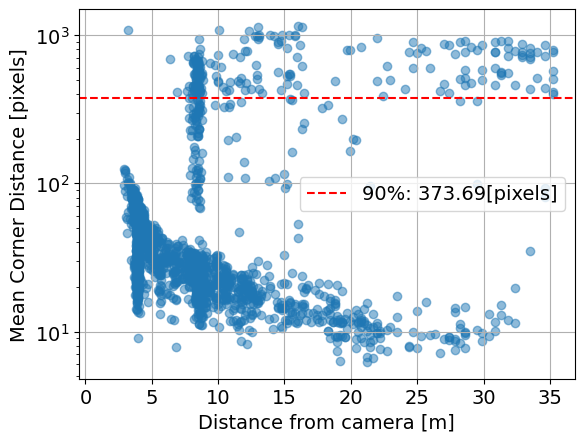

In [89]:

fig, ax = plt.subplots()

# Scatter plot
scatter = ax.scatter(df_results['distance_gt'], df_results['mean_corner_dist'], alpha=0.5)

# Calculate the 90th percentile of the mean corner distance
percentile_90 = df_results['mean_corner_dist'].quantile(0.9)

# Add a horizontal line at the 90th percentile
ax.axhline(y=percentile_90, color='r', linestyle='--', label=f'90%: {percentile_90:.2f}[pixels]')
# Increase the font size of the numbers on the axis
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14)

ax.set_xlim(-0.5)
ax.set_yscale('log')
ax.set_xlabel('Distance from camera [m]', fontsize=14)
ax.set_ylabel('Mean Corner Distance [pixels]', fontsize=14)
ax.grid(True)

# Save the plot as a PDF
fig.savefig(save_path + 'mean_corner_distance_over_distance_log.pdf', format='pdf')
plt.show() 

#### Number of Samples over Distance

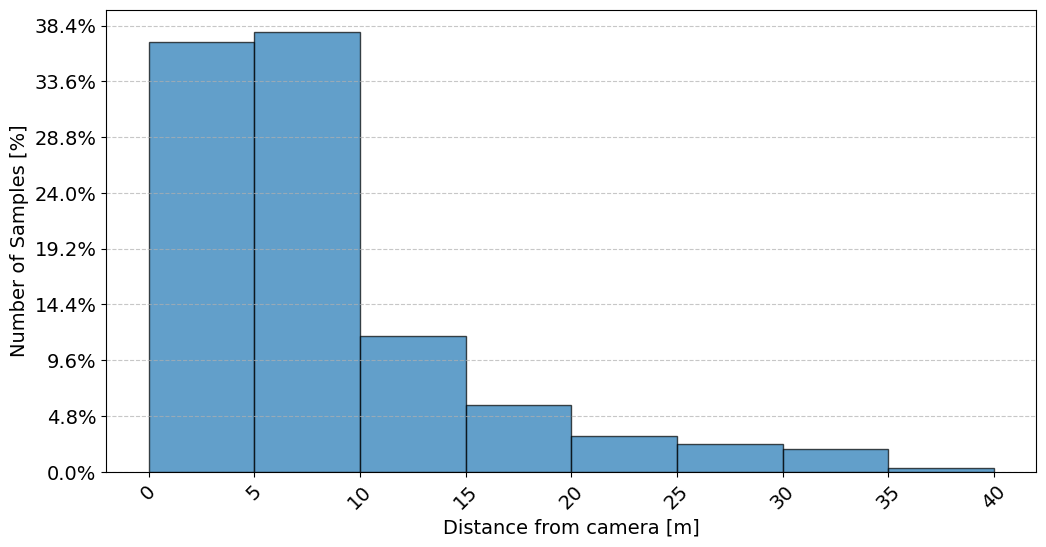

In [90]:
# number of samples over distance
# Define bins for the histogram
fig, ax = plt.subplots()

# Define bins for the histogram
bins = range(0, int(df_results['distance_gt'].max()) + 6, 5)

# Plot the histogram
counts, _, _ = ax.hist(df_results['distance_gt'], bins=bins, edgecolor='black', alpha=0.7)

ax.set_xlabel('Distance from camera [m]', fontsize=14)
ax.set_ylabel('Number of Samples [%]', fontsize=14)
ax.set_xticks(bins)
ax.tick_params(axis='x', rotation=45)
# Increase the font size of the numbers on the axis
ax.tick_params(axis='both', which='major', labelsize=14)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y / len(df_results)) * 100:.1f}%'))
fig.set_size_inches(12, 6)  # Set the figure size to make the plot wider
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PDF
fig.savefig(save_path + 'number_of_samples_over_distance.pdf', format='pdf')
plt.show()

#### Z Axis Angle Error over Distance

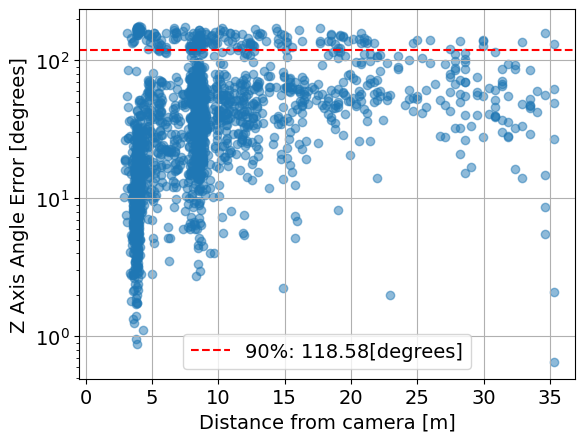

In [ ]:
fig, ax = plt.subplots()

# osa Z
scatter = ax.scatter(df_results['distance_gt'], df_results['z_axis_angle_error'], alpha=0.5)

# Calculate the 90th percentile of the translation distance
percentile_90 = df_results['z_axis_angle_error'].quantile(0.9)

# Add a horizontal line at the 90th percentile
ax.axhline(y=percentile_90, color='r', linestyle='--', label=f'90%: {percentile_90:.2f}[degrees]')
# Increase the font size of the numbers on the axis
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14)

ax.set_xlim(-0.5)
ax.set_yscale('log')
ax.set_xlabel('Distance from camera [m]', fontsize=14)
ax.set_ylabel('Z Axis Angle Error [degrees]', fontsize=14)
ax.grid(True)

# Save the plot as a PDF
fig.savefig(save_path + 'z_axis_angle_error_over_distance_log.pdf', format='pdf')
plt.show()

#### Distribution of z-axis Orientation Error

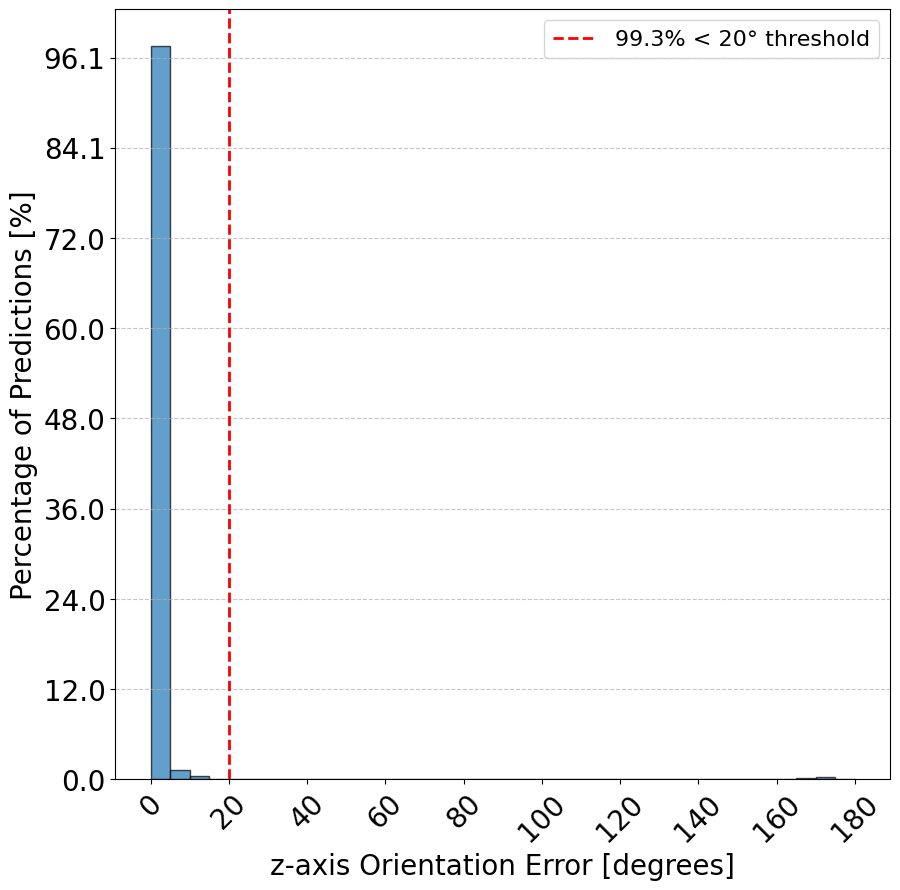

In [53]:
fig, ax = plt.subplots()

# Define bins for the histogram
bins = range(0, int(df_results['z_axis_angle_error'].max()) + 5, 5)

# Plot the histogram
counts, _, _ = ax.hist(df_results['z_axis_angle_error'], bins=bins, edgecolor='black', alpha=0.7)

ax.set_xlabel('z-axis Orientation Error [degrees]', fontsize=20)
ax.set_ylabel('Percentage of Predictions [%]', fontsize=20)
ax.set_xticks(bins)
ax.tick_params(axis='x', rotation=45)
# Increase the font size of the numbers on the axis
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticks(list(bins)[::4])

total_predictions = len(df_results)

# Calculate percentage of predictions with error less than 20 degrees
percent_below_20 = (df_results['z_axis_angle_error'] < 20).sum() / total_predictions * 100

# Draw a red vertical line at 20 degrees
ax.axvline(x=20, color='red', linestyle='--', linewidth=2, label=f'{percent_below_20:.1f}% < 20° threshold')

# Add legend for the threshold line
ax.legend(fontsize=16)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y / total_predictions) * 100:.1f}'))
ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.set_size_inches(10, 10)  # Set the figure size to make the plot wider

# Save the plot as a PDF
fig.savefig(save_path + 'z_axis_orientation_error_distribution.pdf', format='pdf')
plt.show()


#### Heading error over distance

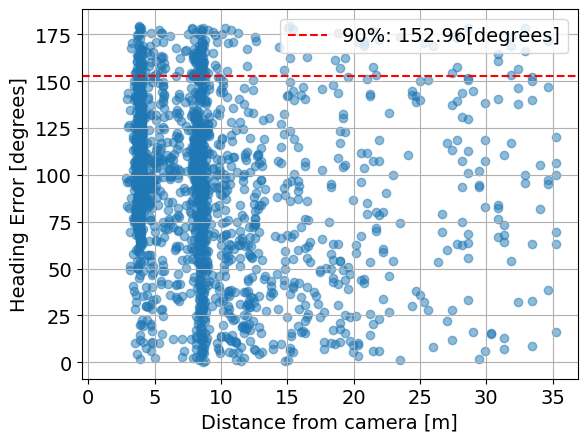

In [93]:
fig, ax = plt.subplots()

# Heading
scatter = ax.scatter(df_results['distance_gt'], df_results['heading_error'], alpha=0.5)

# Calculate the 90th percentile of the heading error
percentile_90 = df_results['heading_error'].quantile(0.9)

# Add a horizontal line at the 90th percentile
ax.axhline(y=percentile_90, color='r', linestyle='--', label=f'90%: {percentile_90:.2f}[degrees]')
# Increase the font size of the numbers on the axis
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14)

ax.set_xlim(-0.5)
ax.set_xlabel('Distance from camera [m]', fontsize=14)
ax.set_ylabel('Heading Error [degrees]', fontsize=14)
ax.grid(True)

# Save the plot as a PDF
fig.savefig(save_path + 'heading_error_over_distance.pdf', format='pdf')
plt.show()

In [94]:
# Error in x y z , where x is vector heading in the direction of target. 

#### Distribution of heading error

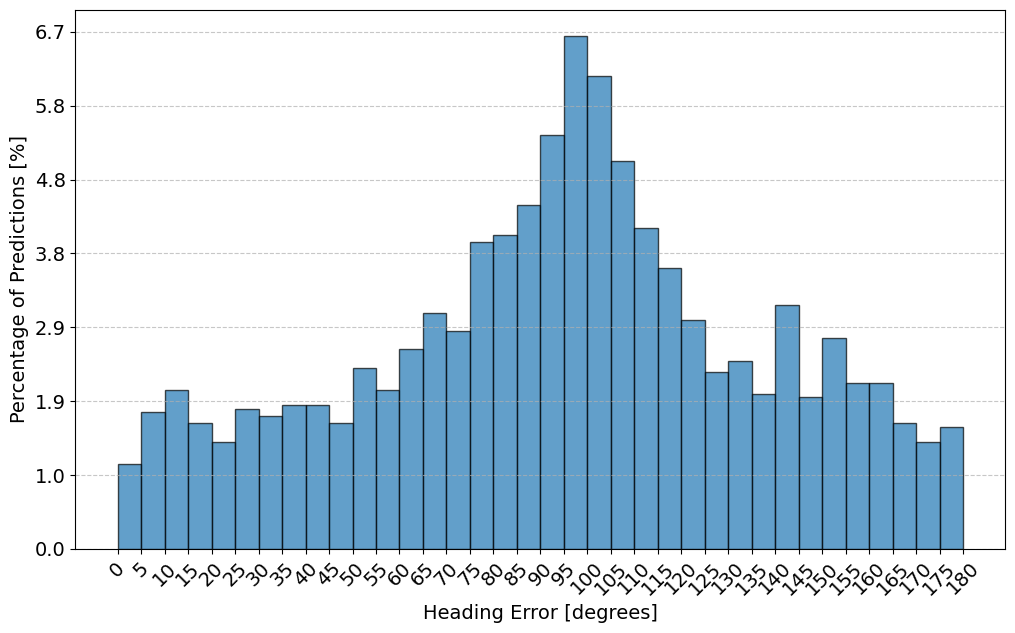

In [95]:
fig, ax = plt.subplots()

# Plot the histogram
counts, _, _ = ax.hist(df_results['heading_error'], bins=bins, edgecolor='black', alpha=0.7)

ax.set_xlabel('Heading Error [degrees]', fontsize=14)
ax.set_ylabel('Percentage of Predictions [%]', fontsize=14)
ax.set_xticks(bins)
ax.tick_params(axis='x', rotation=45)
# Increase the font size of the numbers on the axis
ax.tick_params(axis='both', which='major', labelsize=14)

total_predictions = len(df_results)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y / total_predictions) * 100:.1f}'))
ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.set_size_inches(12, 7)  # Set the figure size to make the plot wider

# Save the plot as a PDF
fig.savefig(save_path + 'heading_error_distribution.pdf', format='pdf')
plt.show()